In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import kruskal, pointbiserialr, randint, uniform

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score

In [159]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MaskiVal/DataSets/main/liver_patient.csv')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

## 1 - Exploration des données

### 1.1.1 Nombre de données, visualisation des colonnes du dataset, des types de données et les duplicatas

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.shape

(583, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [ ]:
#affiche tous les doublons
df[df.duplicated(keep=False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


### 1.1.2 - Observation des valeurs NULL

In [ ]:
df_copy = df.copy()

df_copy[df_copy.isna().any(axis = 1)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [ ]:
# vérification des valeurs qui sont au dessus de Total_Bilirubin
vérif = df['Direct_Bilirubin'] > df['Total_Bilirubin']
df_anomalie = df[vérif]
df_anomalie

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
246,55,Male,1.8,9.0,272,22,79,6.1,2.7,0.7,1
261,33,Male,1.5,7.0,505,205,140,7.5,3.9,1.0,1
279,48,Female,1.0,1.4,144,18,14,8.3,4.2,1.0,1


## 1.2 - Observation des variables du dataframe 

### 1.2.1 - Analyse de la distribution

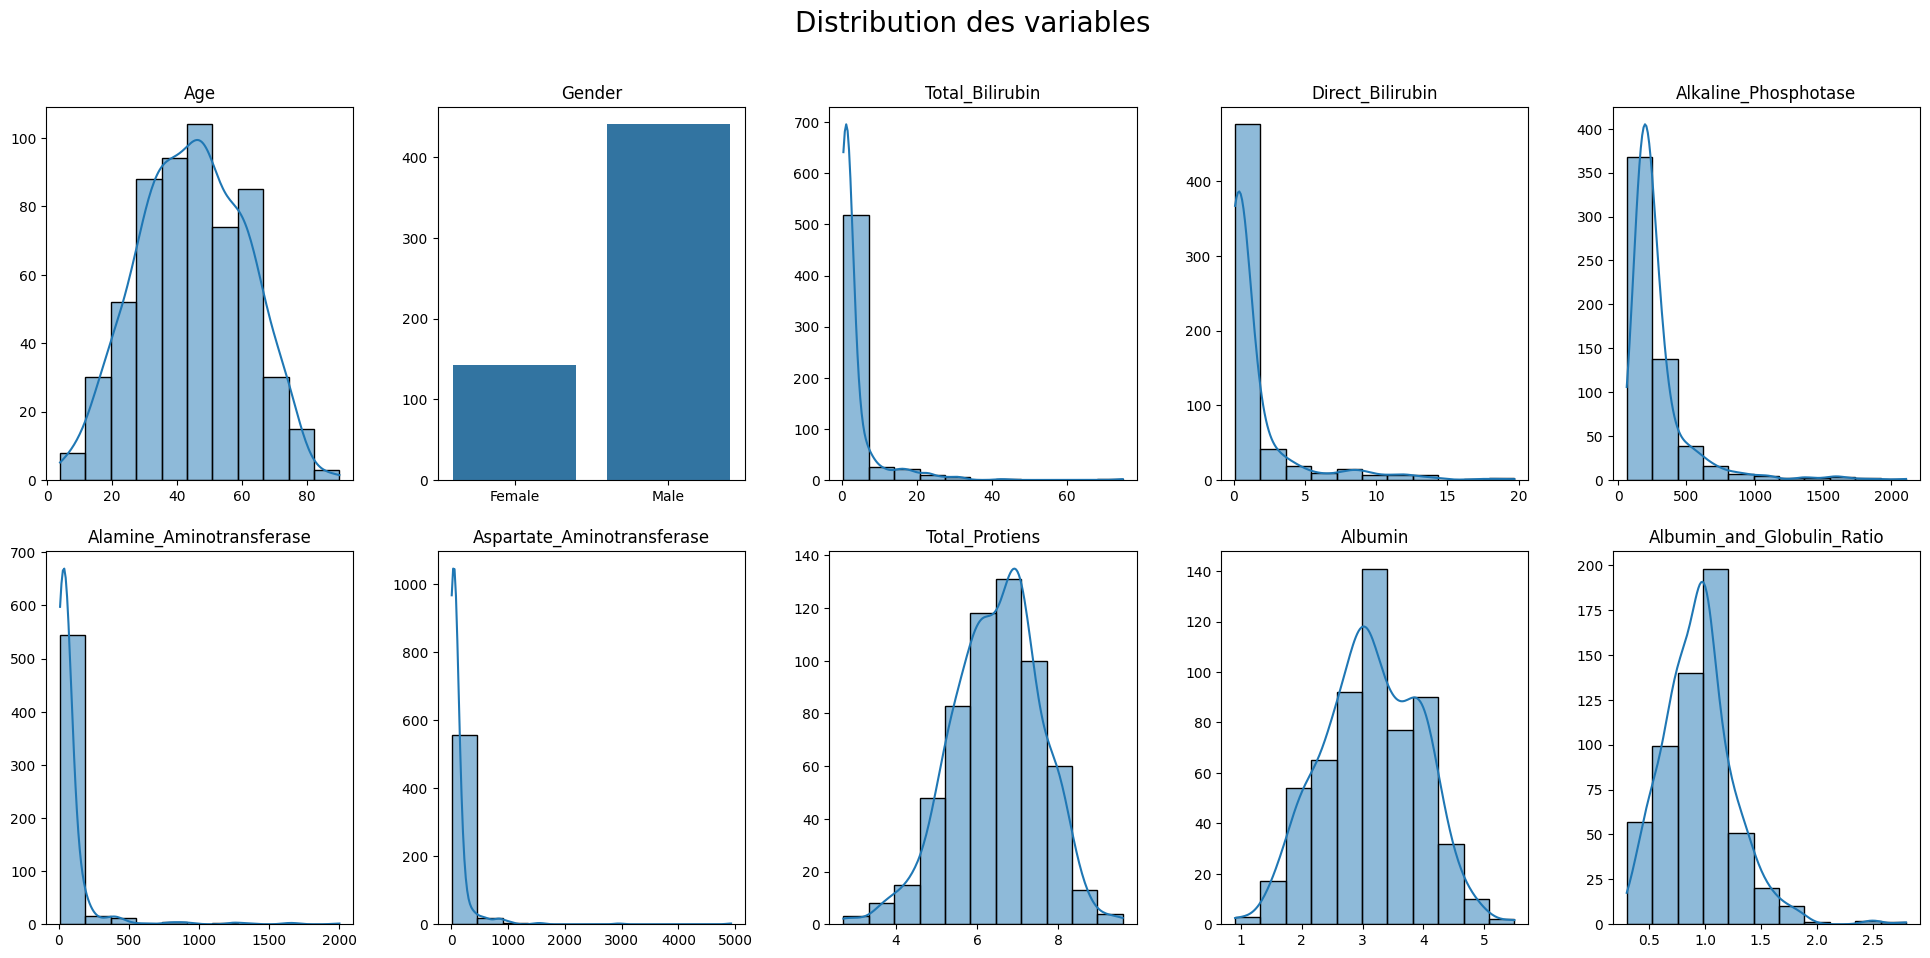

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 rangées et 5 colonnes pour un total de 10 sous-graphiques
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

df_analyse = df.drop(columns=['Dataset'])
# Boucle sur les colonnes pour créer les histogrammes
for i, col in enumerate(df_analyse):
    ax = axes[i//5, i%5]
    if col == "Gender":
        sns.countplot(x=df[col], ax=ax)
        ax.set_title('Gender')
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        sns.histplot(df[col], bins='sturges', kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.show()

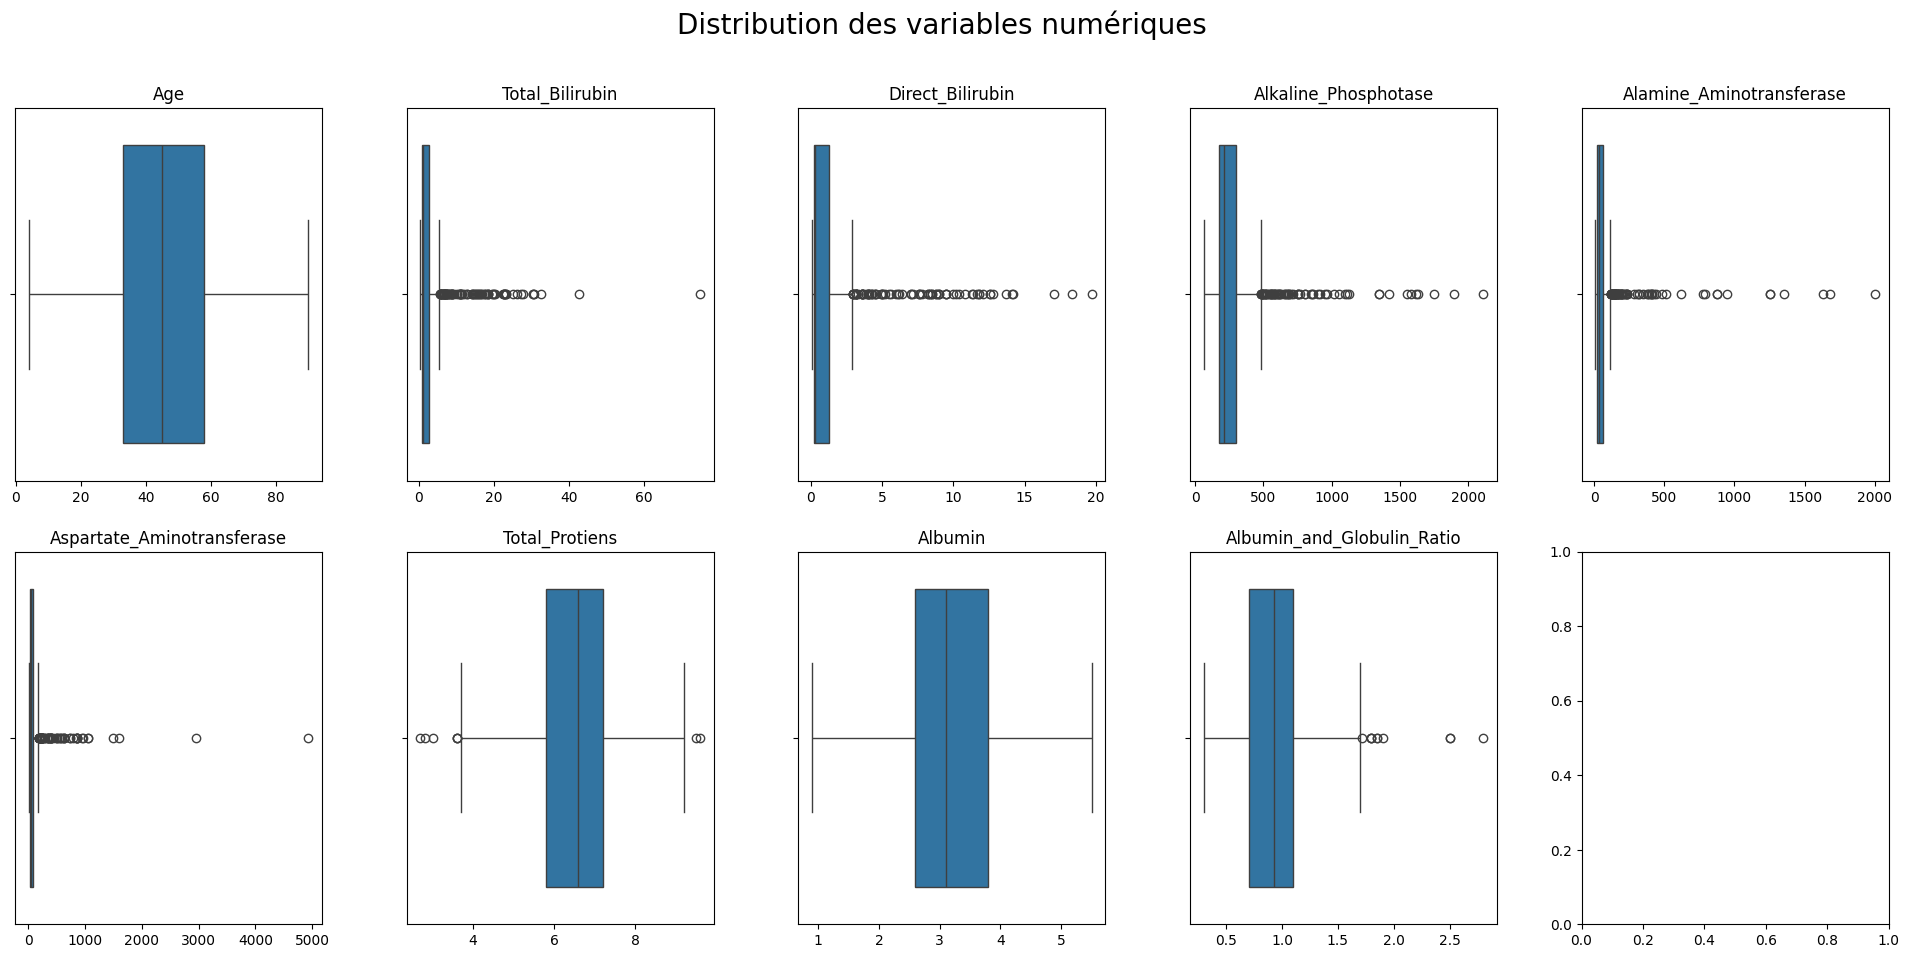

In [ ]:
'''
Observation des data pour observer les outliers 
suite à l'observation des distributions sur les variables
'''
df_num = df_analyse.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Distribution des variables numériques', fontsize=20)
fig.tight_layout(pad=3.0)


for i, col in enumerate(df_num):
    sns.boxplot(x=df[col], ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

D'après les définitions des variables et les valeurs attendu il ne devraient y avoir des outliers que sur la partie supérieure ce qu'on a, sauf pour la colonne Total_Proteins.

#### Commentaire sur les outliers Q1:

Total_Proteins : les outliers ne sont pas très grands mais peuvent s'expliquer par des cas avancés où la synthèse protéique du foie est compromise.

#### Commentaires sur les outliers Q3:

L'ensemble des outliers des colonnes Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase et Aspartate_Aminotransferase sont des cas très sévère qui peuvent être lié au maladie suivante : Hémochromatose, Maladie de Wilson, NASH, cirrhose, Hépatites, stéatohépatite non-alcoolique.
Ces outliers restent donc cohérents dans l'ensemble à part quelques cas extrêmes : Aspartate_Aminotransferase avec 4929.0, Alamine_Aminotransferase à 2000.0, Alkaline_Phosphotase à 2110.0 et Total_Bilirubin à 75.

## 2 - Nettoyage des données

### 2.1 - Traitement des valeur manquantes grâce à un graphique de repartition du ratio albumine globuline 

C:\Users\Thomas\AppData\Local\Temp\ipykernel_22692\3122716700.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Albumin_and_Globulin_Ratio'], shade=True)


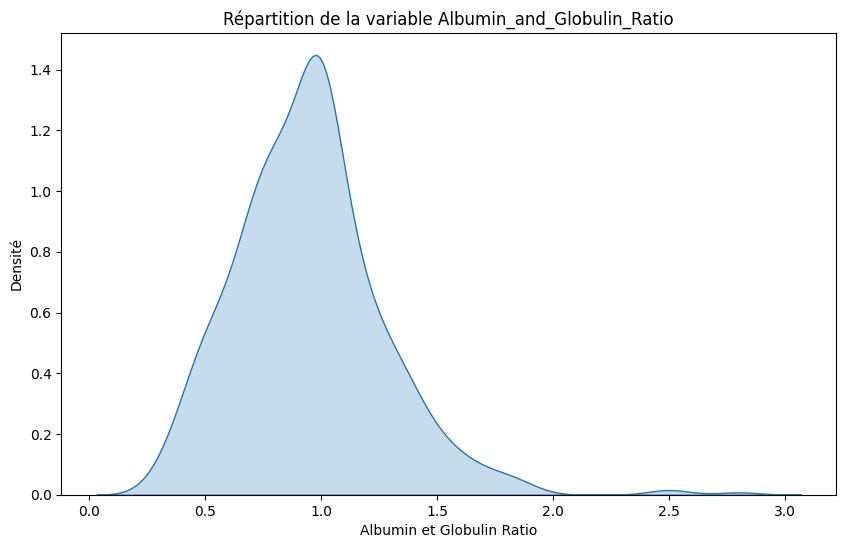

In [ ]:
# diagramme répartition albumin-globuline ration
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Albumin_and_Globulin_Ratio'], shade=True)
plt.title('Répartition de la variable Albumin_and_Globulin_Ratio')
plt.xlabel('Albumin et Globulin Ratio')
plt.ylabel('Densité')
plt.show()

In [ ]:
skewness = df['Albumin_and_Globulin_Ratio'].skew()
print(f"\nSkewness de 'Albumin_and_Globulin_Ratio': {skewness}")


Skewness de 'Albumin_and_Globulin_Ratio': 0.9922994479668144


In [ ]:
# On choisit de remplacer les valeurs manquantes par la médiane car la distribution est asymétrique

df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)
df

C:\Users\Thomas\AppData\Local\Temp\ipykernel_22692\3247890672.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
skewness = df['Albumin_and_Globulin_Ratio'].skew()
print(f"\nSkewness de 'Albumin_and_Globulin_Ratio': {skewness}")


Skewness de 'Albumin_and_Globulin_Ratio': 0.996779661760487


In [ ]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### 2.3 - Traitement des doublons

In [154]:
# suppression des doublons car ce sont les mêmes patients	

df = df.drop_duplicates()
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,Male,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2.0
579,40.0,Male,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1.0
580,52.0,Male,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1.0
581,31.0,Male,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1.0


In [155]:
df['Gender'].unique()

array(['Female', 'Male', 7.5], dtype=object)

In [ ]:
# changement de la valeur 75 dans la colonne total_bilirubine à 7.5

df[df['Total_Bilirubin'] == 75] = 7.5

df.describe().T

C:\Users\Thomas\AppData\Local\Temp\ipykernel_22692\2121977014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Total_Bilirubin'] == 75] = 7.5
C:\Users\Thomas\AppData\Local\Temp\ipykernel_22692\2121977014.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df['Total_Bilirubin'] == 75] = 7.5
C:\Users\Thomas\AppData\Local\Temp\ipykernel_22692\2121977014.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.5' has dtype incompatible with int64, please explicitly cast to a compatible

,count,mean,std,min,25%,50%,75%,max
Age,570.0,44.765789,16.311714,4.0,33.00,45.00,58.00,90.0
Total_Bilirubin,570.0,3.203333,5.502203,0.4,0.80,1.00,2.60,42.8
Direct_Bilirubin,570.0,1.504386,2.843010,0.1,0.20,0.30,1.30,19.7
Alkaline_Phosphotase,570.0,291.181579,245.574684,7.5,175.25,208.00,298.00,2110.0
Alamine_Aminotransferase,570.0,79.671053,181.489306,7.5,23.00,35.00,60.00,2000.0
Aspartate_Aminotransferase,570.0,109.278070,290.906323,7.5,25.00,41.00,86.75,4929.0
Total_Protiens,570.0,6.498596,1.089040,2.7,5.80,6.60,7.20,9.6
Albumin,570.0,3.157719,0.816924,0.9,2.60,3.10,3.80,7.5
Albumin_and_Globulin_Ratio,570.0,0.959982,0.420167,0.3,0.70,0.94,1.10,7.5
Dataset,570.0,1.299123,0.522347,1.0,1.00,1.00,2.00,7.5


In [ ]:
# Drop des colonnes Direct_Bilirubin, Aspartate_Aminotransferase, Total_Protiens, Albumin car trop correler avec les autres

df_cleaned =  df.drop(columns=['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin'])
df_cleaned

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
0,65.0,Female,0.7,187.0,16.0,0.90,1.0
1,62.0,Male,10.9,699.0,64.0,0.74,1.0
2,62.0,Male,7.3,490.0,60.0,0.89,1.0
3,58.0,Male,1.0,182.0,14.0,1.00,1.0
4,72.0,Male,3.9,195.0,27.0,0.40,1.0
...,...,...,...,...,...,...,...
578,60.0,Male,0.5,500.0,20.0,0.37,2.0
579,40.0,Male,0.6,98.0,35.0,1.10,1.0
580,52.0,Male,0.8,245.0,48.0,1.00,1.0
581,31.0,Male,1.3,184.0,29.0,1.00,1.0


In [ ]:
df_cleaned['Gender'].unique()

array(['Female', 'Male', 7.5], dtype=object)

## 3 - Visualisation des données

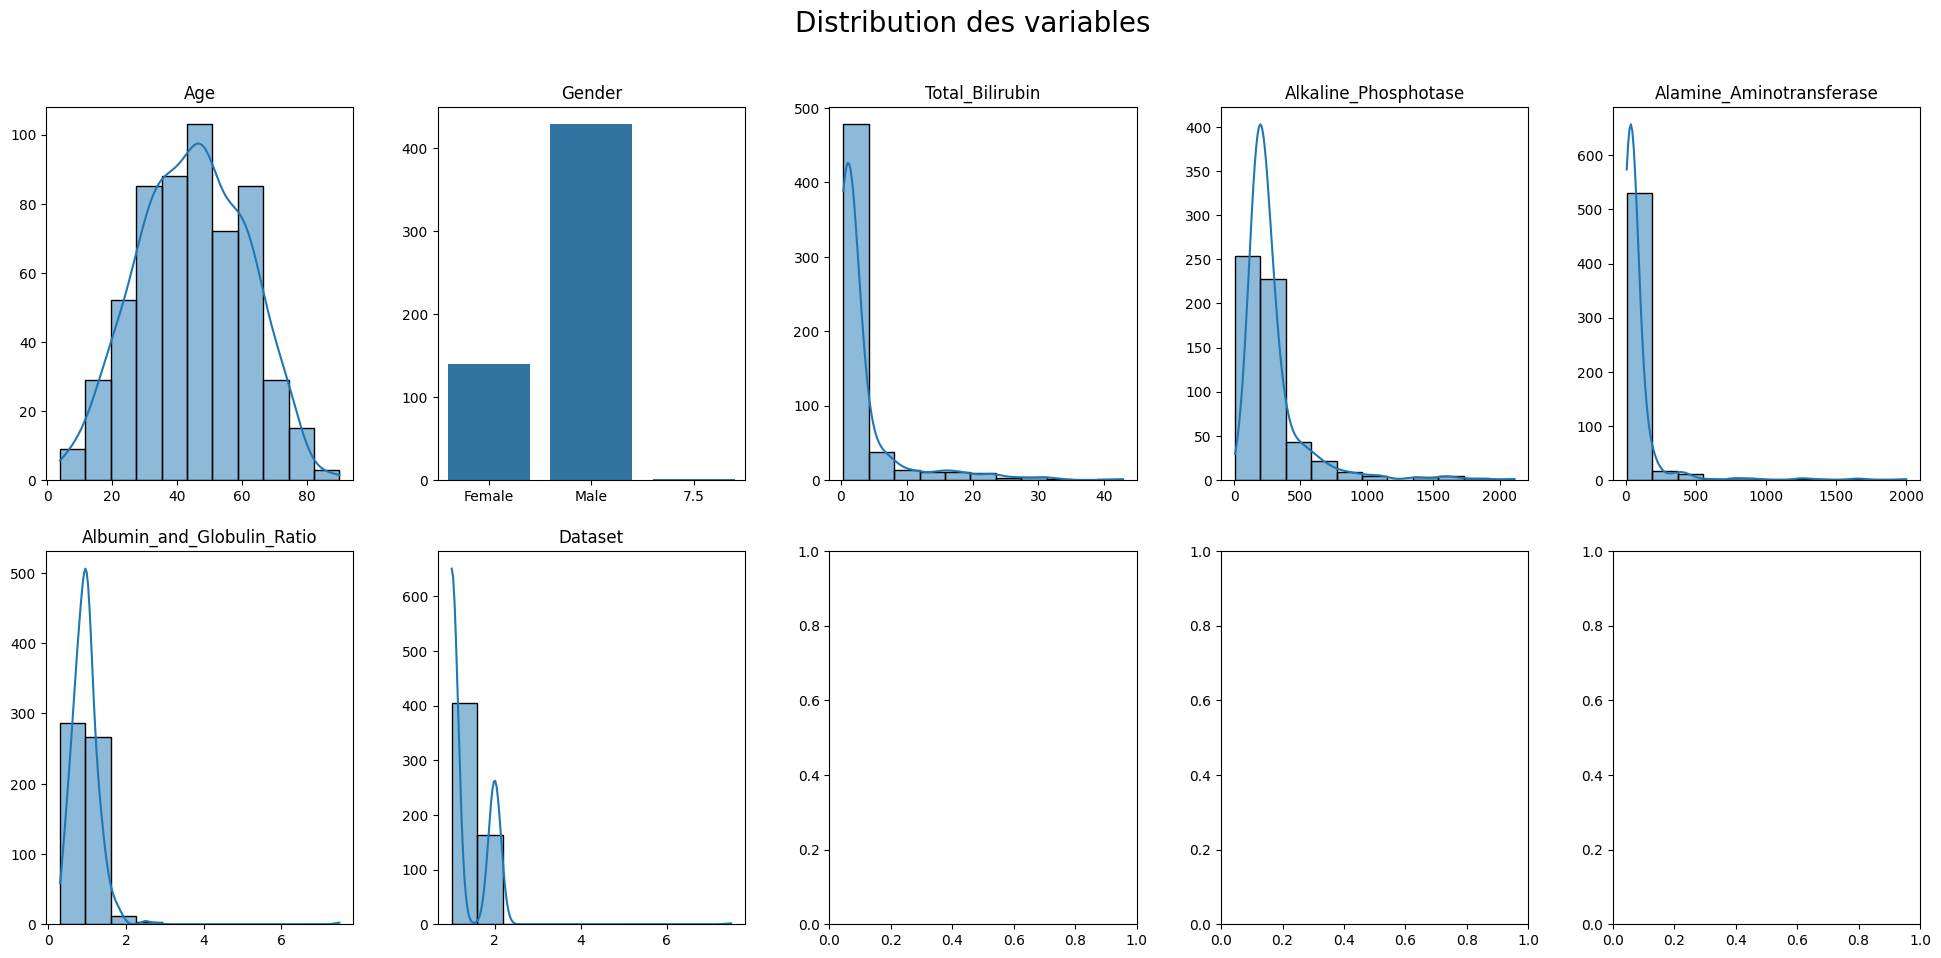

In [ ]:
'''
Observation des data 
'''
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 rangées et 5 colonnes pour un total de 10 sous-graphiques
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

# Boucle sur les colonnes pour créer les histogrammes
for i, col in enumerate(df_cleaned):
    ax = axes[i//5, i%5]
    if col == "Gender":
        sns.countplot(x=df_cleaned[col], ax=ax)
        ax.set_title('Gender')
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        sns.histplot(df[col], bins='sturges', kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

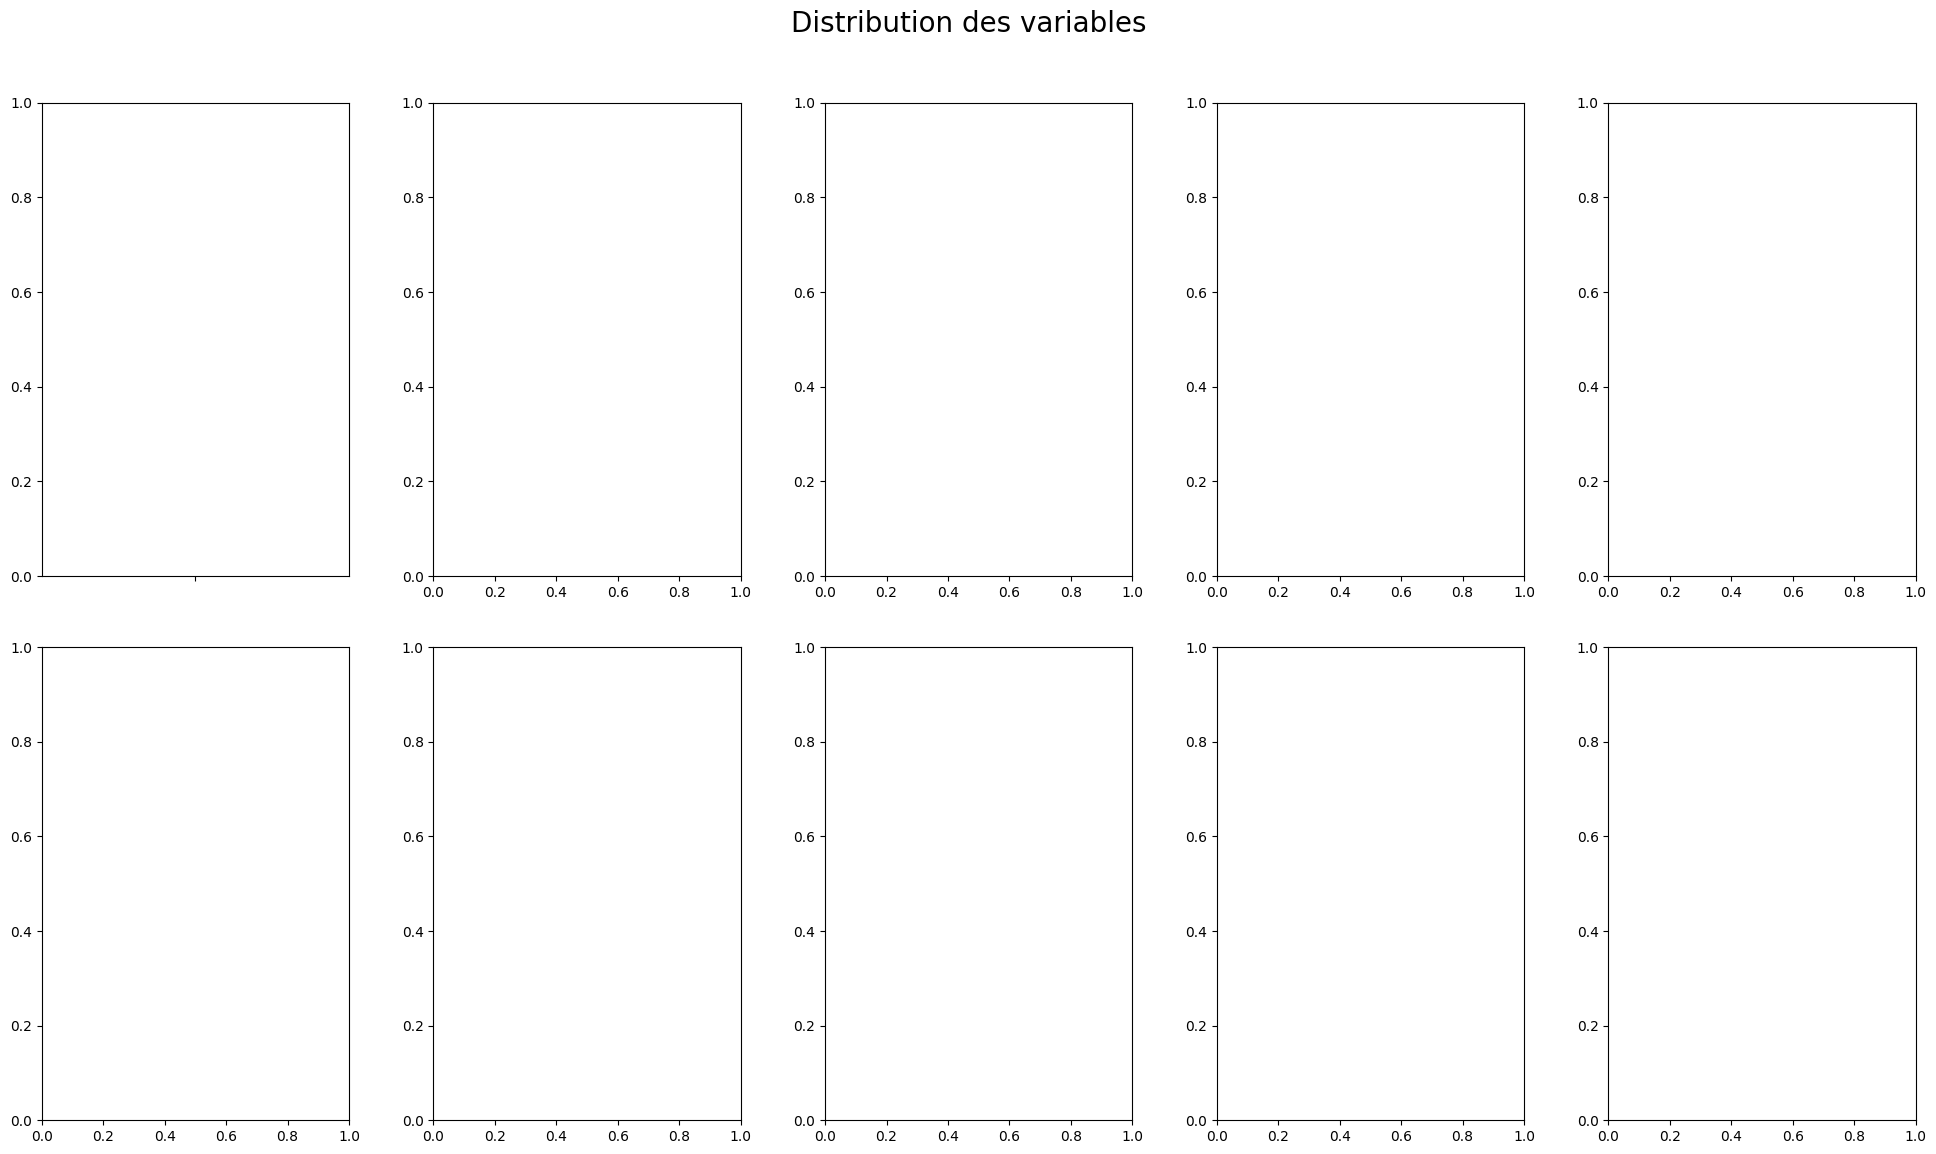

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

# Boucle sur les colonnes à partir de la deuxième (car 'Gender' est catégorique)
for i, col in enumerate(df_cleaned.columns[1:]):
    sns.boxplot(df_cleaned[col], bins='sturges', kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
    axes[i//4, i%4].set_xlabel('')
    axes[i//4, i%4].set_ylabel('')

plt.show()

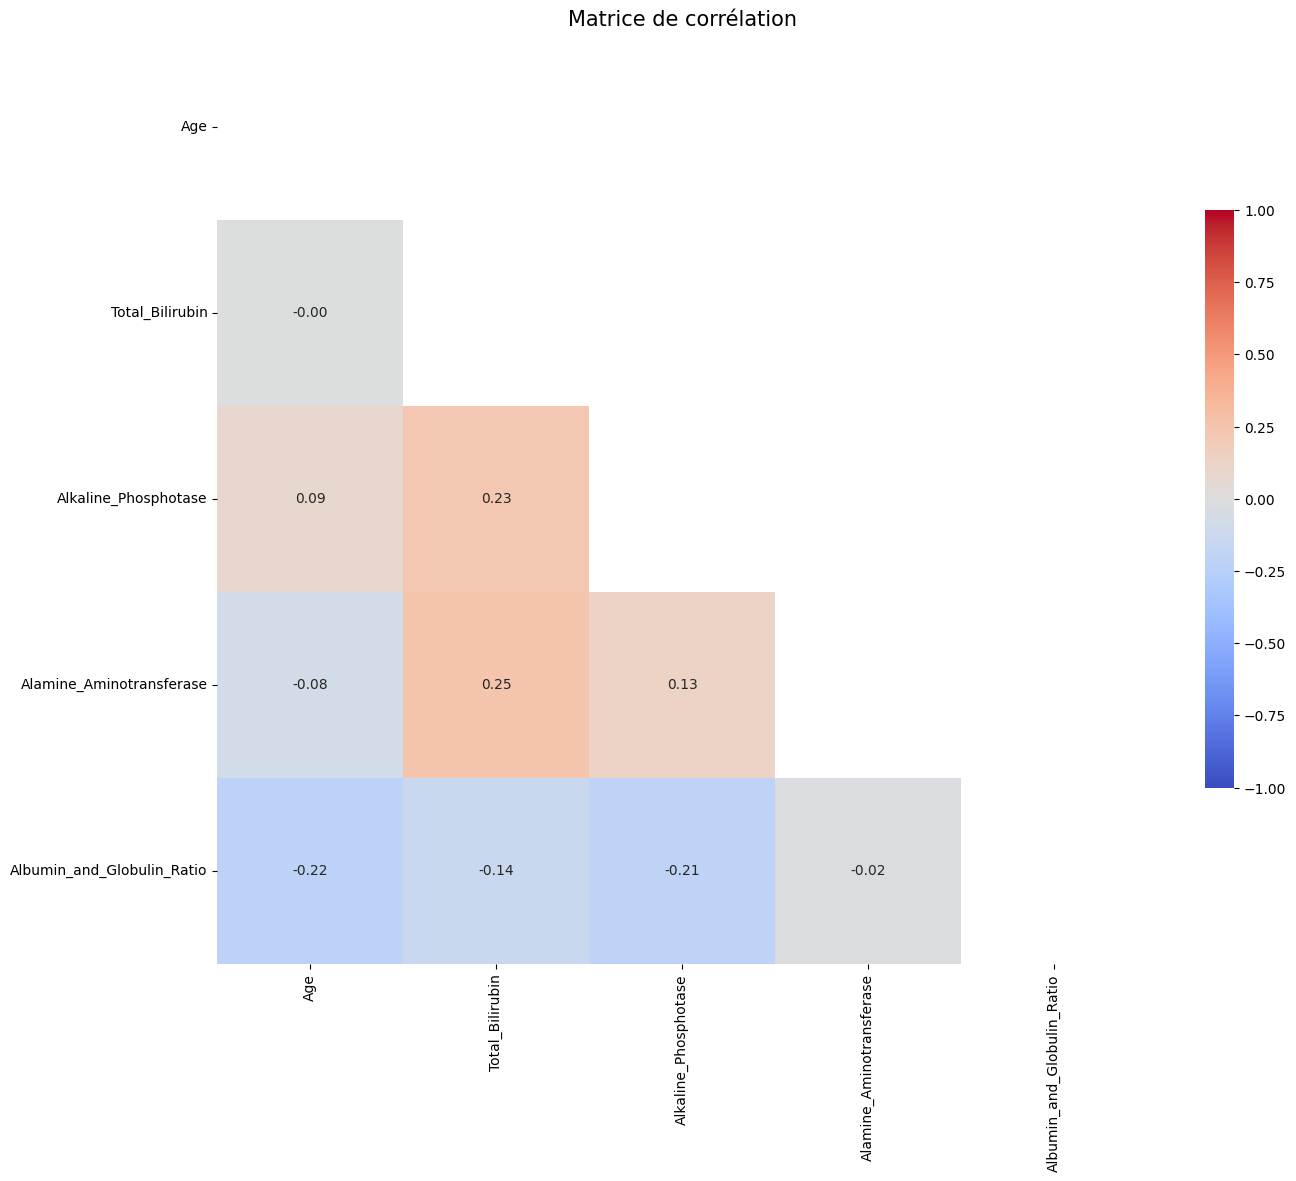

In [ ]:
# observation des corrélations avec la matrice de corrélation
list_columns_corr = [col for col in df_cleaned.columns if (col != 'Dataset') and (col != 'Gender')]

plt.figure(figsize=(15, 15))

corr = df_cleaned[list_columns_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Matrice de corrélation', fontsize=15)
plt.show()

#### 3.2.2 - Correlations des variables numériques et de la variable de classification

In [ ]:
# encodage 0 ou 1 pour la class 'dataset'
label_encoder = LabelEncoder()

In [ ]:
df_cleaned['Gender'] = LabelEncoder().fit_transform(df_cleaned['Gender'])
df_cleaned['Dataset'] = LabelEncoder().fit_transform(df_cleaned['Dataset'])

In [ ]:
# Sélection des colonnes sans la colonne 'Dataset'
col_without_ds = df_cleaned.iloc[:, :-1]

col_without_ds = col_without_ds.apply(pd.to_numeric, errors='coerce')

correlations = {}

# Calculer la corrélation bisériale ponctuelle pour chaque variable
for col in col_without_ds:
    if col in df_cleaned:
        correlations[col] = pointbiserialr(df_cleaned['Dataset'], df_cleaned[col])[0]

# Convert the dictionary to a DataFrame for the heatmap
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df.set_index('Variable', inplace=True)

# Create the figure for the heatmap
plt.figure(figsize=(10, 1))

# Plot the heatmap
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Heatmap des valeurs numériques par rapport à la valeur de classification')

# Show the heatmap
plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U6')) -> None

## 4 - Validations statistique pour l'interpretation des résultats

### 4.1 - Sépration des variables en df_1 et df_2

In [158]:
df_1 = df_cleaned[df_cleaned['Dataset'] == 1]
df_2 = df_cleaned[df_cleaned['Dataset'] == 2]